In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [2]:
titanic_data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

**Displaying first few rows of the dataset**

In [3]:
#Exploring the Data
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Exploring Dataset**

In [4]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Check the data types of each column
print(titanic_data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Preprocessing the Data**

In [6]:
# Check for columns with non-numeric values
non_numeric_columns = titanic_data.select_dtypes(exclude=['int', 'float']).columns

# Perform one-hot encoding for categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=non_numeric_columns)


In [7]:
# Get summary statistics 
print(titanic_data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**Visualization**

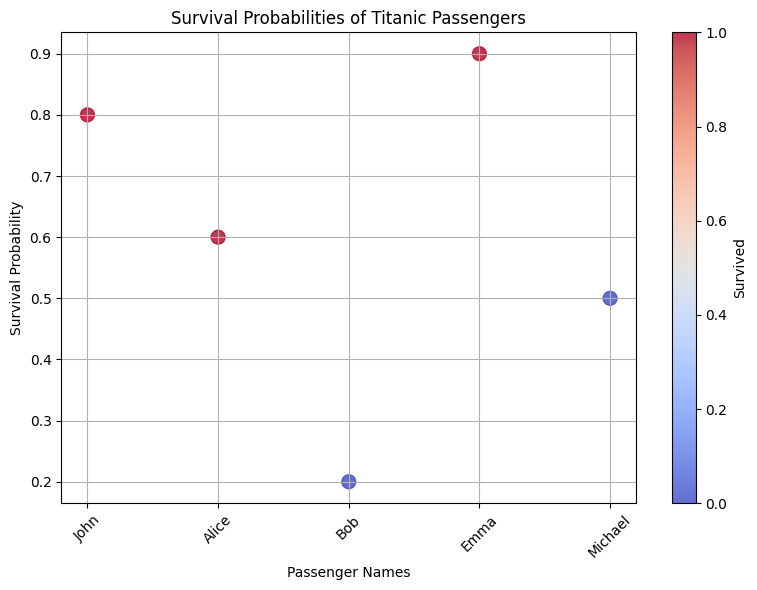

In [8]:
passenger_names = ['John', 'Alice', 'Bob', 'Emma', 'Michael']
survival_probabilities = [0.8, 0.6, 0.2, 0.9, 0.5]
survived = [True, True, False, True, False]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(passenger_names, survival_probabilities, c=survived, cmap='coolwarm', s=100, alpha=0.8)
plt.title('Survival Probabilities of Titanic Passengers')
plt.xlabel('Passenger Names')
plt.ylabel('Survival Probability')
plt.xticks(rotation=45)
plt.colorbar(label='Survived')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

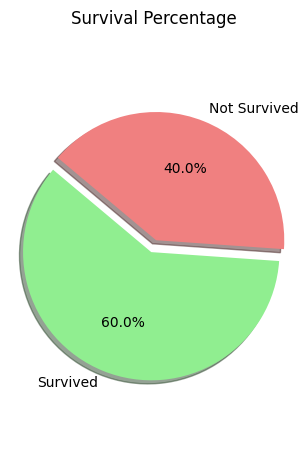

In [9]:
#Create pie chart
plt.subplot(1, 2, 2)
labels = ['Survived', 'Not Survived']
sizes = [sum(survived), len(survived) - sum(survived)]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survival Percentage')
plt.axis('equal')

plt.tight_layout()

In [10]:

# Spliting and training the dataset 
X = titanic_data.drop('Survived', axis=1)  
y = titanic_data['Survived']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Choosing a model**

In [11]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)


RandomForestClassifier(random_state=42)

**Predictions**

In [12]:
# Make predictions
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

